# 0 KR Appstore review wordcloud

In [1]:
import os
os.getcwd()

'C:\\Users\\LG\\DataScience\\Project\\NO_3_ZEPETO\\Crawling'

In [2]:
# ÌïëÌÅ¨ÏÉâ warning ÏïàÎÇ¥Î¨∏ Î∞©ÏßÄ 
import warnings
warnings.filterwarnings('ignore')

# 1 ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§

In [3]:
# ÏõåÎìúÌÅ¨ÎùºÏö∞ÎìúÏóê ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§
import pandas as pd
import numpy as np
import re

In [4]:
df = pd.read_csv('data/zepeto_kr_review.csv', encoding = 'utf-8')
df.head()

DATE  STAR  LIKE  DISLIKE                   TITLE  \
0  2022-07-22 16:51:14     5     0        0               ÎÑàÎ¨¥ Í≥†ÎßàÏõåÏöî‚Ä¶üíó   
1  2022-07-22 11:25:05     1     0        0                     ÌõÑ..   
2  2022-07-22 07:54:59     5     0        0  ÌóàÏúÑÏã†Í≥†, Ïò§Î•ò, Î∂àÏ∞∞ÎèÑ Í≤ÄÌÜ† Ìï¥Ï£ºÏÑ∏Ïöîüò•   
3  2022-07-22 07:13:59     1     0        0                       „Öã   
4  2022-07-22 02:14:56     5     0        0                      Ï¢ãÏùå   

                                              REVIEW  
0    ÏúºÏïÑÏïÑÏïÑÏïÑÏïÑ„Öè„Öè„Öè„Öè\nÎìúÎîîÏñ¥ ÌÅ¨Î¶¨ÌÖúÏù¥!!!!!!!!!!\nÏïÑÏïÑÏïÑÏïÑ Í≥†ÎßàÏõåÏöîÏò§Ïò§Ïò§Ïò§‚ù§Ô∏è  
1  ÏïÑÎãà 31ÏùºÏß∏Ïù∏Îç∞ ÏÑ†Î¨ºÏù¥ ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî. Ï†úÍ∞Ä Ïô†ÎßåÌïòÎ©¥ Îßê ÏïàÌïòÎäîÎç∞ Ï†ÄÎèÑ ÏÇ¨Ï†ïÏù¥ ÏûàÍ≥†,...  
2  Ï†ÄÎäî Ï†úÌéòÌÜ† Ï¥àÏ∞ΩÍ∏∞ ÎïåÎ∂ÄÌÑ∞ Ïó¥Ïã¨Ìûà Íæ∏Ï§ÄÌûà Ï∫êÎ¶≠ÌÑ∞Î•º ÌÇ§Ïõå Ïò® Ïú†Ï†ÄÏûÖÎãàÎã§. Ï†ÄÎäî Ïã†Í≥† ...  
3  „Öà„Ñ¥ ÏûºÎØºÏù¥Îì§Îßå ÌïòÎäî Í≤åÏûÑÏûÑ \nÏù¥Í±∞ ÏôúÌï® Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ „Öã„Öã„Öã„Öã\nÏûºÎØºÏù¥Îì§ÏïÑ Í±ç Ï≥ê...  
4  Í∞ëÏûêÍ∏∞ Ï†úÌéòÌÜ† Î©îÏÑ∏ÏßÄÍ∞Ä Îã§ ÏßÄÏõåÏßàÏàòÏûàÎÇòÏöî?\nÏßÄÏö¥Í±¥ ÏïÑÎãåÎç∞ Îã§ ÎÇ†ÏïÑÍ∞ÄÎäîÍ±∞ÎùºÍ≥† Ìï¥ÏïºÌïò...

# 2 wordcloud ÌôòÍ≤Ω ÏÑ∏ÌåÖ

## NLTK ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨

In [5]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [6]:
# ÎßêÎ≠âÏπò(corpus)Îäî ÏûêÏó∞Ïñ¥ Î∂ÑÏÑù ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÎßåÎì† ÏÉòÌîå Î¨∏ÏÑú ÏßëÌï©ÏùÑ ÎßêÌïúÎã§.
corpus = DoublespaceLineCorpus('data/zepeto_kr_review.csv')
len(corpus)

1065

In [7]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.135 Gb


In [8]:
corpus = DoublespaceLineCorpus('data/zepeto_kr_review.csv', iter_sent = True)
len(corpus)

1053

In [9]:
# Ïûò Î≥ÄÌôò ÎêòÏóàÎäîÏßÄ 4Í∞úÎßå ÎèåÎ†§Î≥¥Í∏∞ -> Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞Ìôî Ìï¥Î≥¥Ïûê 
i = 0
for d in corpus:
    print(i,d)
    i +=1
    if i > 4 :
        break

0 DATE,STAR,LIKE,DISLIKE,TITLE,REVIEW
1 2022-07-22 16:51:14,5,0,0,ÎÑàÎ¨¥ Í≥†ÎßàÏõåÏöî‚Ä¶üíó,"ÏúºÏïÑÏïÑÏïÑÏïÑÏïÑ„Öè„Öè„Öè„Öè
2 ÎìúÎîîÏñ¥ ÌÅ¨Î¶¨ÌÖúÏù¥!!!!!!!!!!
3 ÏïÑÏïÑÏïÑÏïÑ Í≥†ÎßàÏõåÏöîÏò§Ïò§Ïò§Ïò§‚ù§Ô∏è"
4 2022-07-22 11:25:05,1,0,0,ÌõÑ..,"ÏïÑÎãà 31ÏùºÏß∏Ïù∏Îç∞ ÏÑ†Î¨ºÏù¥ ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî. Ï†úÍ∞Ä Ïô†ÎßåÌïòÎ©¥ Îßê ÏïàÌïòÎäîÎç∞ Ï†ÄÎèÑ ÏÇ¨Ï†ïÏù¥ ÏûàÍ≥†, Ïù¥Í±¥ ÏïÑÎãåÍ≤É Í∞ôÏäµÎãàÎã§. Í≥ÑÏÜç ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ 30Ïùº Ïñ¥Ï©åÍ≥† ÏßÑÏßú Ïñ¥Ïù¥ÏóÜÎÑ§Ïöî"


## RegexTokenizer ÏÇ¨Ïö©ÌïòÍ∏∞
https://github.com/lovit/soynlp
-  soynlp Îäî ÏÑ∏ Í∞ÄÏßÄ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Ï†úÍ≥µ
- LTokenizer : L parts ÏóêÎäî Î™ÖÏÇ¨/ÎèôÏÇ¨/ÌòïÏö©ÏÇ¨/Î∂ÄÏÇ¨Í∞Ä ÏúÑÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïñ¥Ï†àÏóêÏÑú L Îßå Ïûò Ïù∏ÏãùÌïúÎã§Î©¥ ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÏù¥ R parts Í∞Ä Îê©ÎãàÎã§. LTokenizer ÏóêÎäî L parts Ïùò Îã®Ïñ¥ Ï†êÏàòÎ•º ÏûÖÎ†•Ìï©ÎãàÎã§.

- MaxScoreTokenizer : ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä Ï†úÎåÄÎ°ú ÏßÄÏºúÏßÄÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÎùºÎ©¥, Î¨∏Ïû•Ïùò ÎùÑÏñ¥Ïì∞Í∏∞ Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎâòÏñ¥ÏßÑ Îã®ÏúÑÍ∞Ä L + [R] Íµ¨Ï°∞Îùº Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§. ÌïòÏßÄÎßå ÏÇ¨ÎûåÏùÄ ÎùÑÏñ¥Ïì∞Í∏∞Í∞Ä ÏßÄÏºúÏßÄÏßÄ ÏïäÏùÄ Î¨∏Ïû•ÏóêÏÑú ÏùµÏàôÌïú Îã®Ïñ¥Î∂ÄÌÑ∞ ÎààÏóê Îì§Ïñ¥ÏòµÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÑ Î™®Îç∏Î°ú ÏòÆÍ∏¥ MaxScoreTokenizer Ïó≠Ïãú Îã®Ïñ¥ Ï†êÏàòÎ•º Ïù¥Ïö©Ìï©ÎãàÎã§.

- RegexTokenizer : Í∑úÏπô Í∏∞Î∞òÏúºÎ°úÎèÑ Îã®Ïñ¥Ïó¥ÏùÑ ÎßåÎì§ Ïàò ÏûàÏäµÎãàÎã§. Ïñ∏Ïñ¥Í∞Ä Î∞îÎÄåÎäî Î∂ÄÎ∂ÑÏóêÏÑú Ïö∞Î¶¨Îäî Îã®Ïñ¥Ïùò Í≤ΩÍ≥ÑÎ•º Ïù∏ÏãùÌï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ "ÏïÑÏù¥Í≥†„Öã„Öã„Öú„ÖúÏßÑÏßú?" Îäî [ÏïÑÏù¥Í≥†, „Öã„Öã, „Öú„Öú, ÏßÑÏßú, ?]Î°ú ÏâΩÍ≤å Îã®Ïñ¥Ïó¥ÏùÑ ÎÇòÎàïÎãàÎã§.

In [10]:
df = pd.read_csv('data/zepeto_kr_review.csv', encoding="utf-8")

In [100]:
r12 = df[df['STAR'].astype(str).str.contains('1') | df['STAR'].astype(str).str.contains('2')]
r12

DATE  STAR  LIKE  DISLIKE                TITLE  \
1    2022-07-22 11:25:05     1     0        0                  ÌõÑ..   
3    2022-07-22 07:13:59     1     0        0                    „Öã   
9    2022-07-21 05:25:32     2     0        0             ÎπÑÎ≤à ÍπåÎ®πÏùÄ ÌõÑ   
12   2022-07-20 04:47:41     1     0        0               „Öá„Ñ¥ Îπ°ÏπòÎÑ§   
18   2022-07-18 21:04:22     1     0        0               1Ï†êÎèÑÏïÑÍπùÎã§   
..                   ...   ...   ...      ...                  ...   
475  2022-04-10 14:11:06     1     0        0                Í∑∏ÏßÄ Í∞ôÏùå   
489  2022-04-08 09:02:58     1     0        0          Î¨¥Ïñº Í∞úÏÑ†Ìïú Í≤ÅÎãàÍπå.   
490  2022-04-08 08:35:42     2     0        0            ÏïÑÏù¥Ìå®Îìú ÌôîÎ©¥ÎπÑÏú®   
494  2022-04-07 19:31:33     2     0        0                 ÏóÖÎéÉÍ¥ÄÎ†®   
495  2022-04-07 10:25:11     1     0        0  Ïò∑ÏûÖÌûêÎïå ÌëúÏ†ï Î∞îÎÄêÍ±∞ ÎÑàÎ¨¥ Ïù¥ÏÉÅÌï¥Ïöî   

                                                REVIEW  
1    ÏïÑÎãà 31ÏùºÏß∏Ïù∏Îç∞ ÏÑ†Î¨ºÏù¥ ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî. Ï†úÍ∞Ä Ïô†ÎßåÌïòÎ©¥ Îßê ÏïàÌïòÎäîÎç∞ Ï†ÄÎèÑ ÏÇ¨Ï†ïÏù¥ ÏûàÍ≥†,...  
3    „Öà„Ñ¥ ÏûºÎØºÏù¥Îì§Îßå ÌïòÎäî Í≤åÏûÑÏûÑ \nÏù¥Í±∞ ÏôúÌï® Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ „Öã„Öã„Öã„Öã\nÏûºÎØºÏù¥Îì§ÏïÑ Í±ç Ï≥ê...  
9    ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†úÍ∞Ä Ï†ÑÏóê Ïû†Íπê ÏßÄÏõåÏÑú Îã§Ïãú ÍπîÏïòÎã§Í∞Ä ÌïòÎ†§Íµ¨ Ïù¥Î©îÏùº ÌÅ¥Î¶≠ÌñàÎäîÎç∞ ÎπÑÎ≤àÏùÑ Íπå...  
12             ÏïÑÎãà Í≥ÑÏÜç ÌäïÍ≤®Ïöî‚Ä¶Ìïë,Î†âÎèÑ Í≥ÑÏÜç Í±∏Î¶¨Í≥†‚Ä¶.ÏßÑÏßú ÎÑàÎ¨¥Ìï¥ÏÑú Íµ¨Ï∑® ÌïòÍ≥†Ïã∂ÏóàÏùå  
18   ÏïàÎÖïÌïòÏÑ∏Ïöî.Ï†ÄÎäîÏ¥àÎì±ÌïôÏÉùÏú†Ï†ÄÏûÖÎãàÎã§. Ïñ¥ÎäêÎÇ†Ï†úÌéòÌÜ†Î•ºÏïåÍ≤åÎêòÏóàÏñ¥Ïöî Í∑∏ÎûòÏÑúÍπîÏïòÎäîÎç∞Í∞ÄÏûÖÏù¥ÎÑàÎ¨¥Ìûò...  
..                                                 ...  
475                       Î≠êÎßå ÌïòÎ©¥ Îî∞ÎùºÌïòÍ≥† Ïù¥Î¶Ñ Îã§Î•¥Í≤å ÌïòÎ©¥ Î™®Î•¥Ï§Ñ ÏïÑÎÉê?  
489  ÏóÖÎéÉ Îã§Ïãú Ìïú ÏÉÅÌÉúÍ∞Ä Î≠êÍ∞Ä Îã¨ÎùºÏßÑ Í±¥Í∞ÄÏöî. ÏïÑÏù¥Ìå®ÎìúÏÑú Î∂àÌé∏Ìïú ÏÑ∏Î°úÎ™®Îìú Ïó¨Ï†ÑÌïòÍ≥† Ïò∑Í∞à...  
490  ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÍ≥†ÎÇòÏÑú ÎπÑÏú®Ïù¥ Ïù¥ÏÉÅÌï¥Ï°åÎäîÎç∞ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥Ïöî\nÍΩâÏ∞ºÏúºÎ©¥ ÌôîÏßàÏù¥ÎùºÎèÑ Ï¢ãÏïÑÏïºÌïòÎäî...  
494  ÏóÖÎç∞Ïù¥Ìä∏ ÎêúÍ±¥ÏßÄ Î™®Î•¥Í≤†ÎäîÎç∞‚Ä¶ Í∞ëÏûêÍ∏∞ Ïù∏Î¨ºÏù¥ ÎÑàÎ¨¥ Î©çÌï¥Ï†∏ÏûàÎäî Î™®ÏäµÏúºÎ°úÎßå ÏûàÍ≥† ÏõêÎûò Ïò∑...  
495                                        Ï†ÑÏù¥ Ìõ®Ïî¨ ÎÇòÏïÑÏöî..  

[125 rows x 6 columns]

### 2-1 REVIEW Ïª¨ÎüºÏúºÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [101]:
# Ïó¨Í∏∞ÏÑú review Ïª¨ÎüºÎßå Í∞ñÍµ¨Ïò¨Í±∞ÏûÑ
r12

DATE  STAR  LIKE  DISLIKE                TITLE  \
1    2022-07-22 11:25:05     1     0        0                  ÌõÑ..   
3    2022-07-22 07:13:59     1     0        0                    „Öã   
9    2022-07-21 05:25:32     2     0        0             ÎπÑÎ≤à ÍπåÎ®πÏùÄ ÌõÑ   
12   2022-07-20 04:47:41     1     0        0               „Öá„Ñ¥ Îπ°ÏπòÎÑ§   
18   2022-07-18 21:04:22     1     0        0               1Ï†êÎèÑÏïÑÍπùÎã§   
..                   ...   ...   ...      ...                  ...   
475  2022-04-10 14:11:06     1     0        0                Í∑∏ÏßÄ Í∞ôÏùå   
489  2022-04-08 09:02:58     1     0        0          Î¨¥Ïñº Í∞úÏÑ†Ìïú Í≤ÅÎãàÍπå.   
490  2022-04-08 08:35:42     2     0        0            ÏïÑÏù¥Ìå®Îìú ÌôîÎ©¥ÎπÑÏú®   
494  2022-04-07 19:31:33     2     0        0                 ÏóÖÎéÉÍ¥ÄÎ†®   
495  2022-04-07 10:25:11     1     0        0  Ïò∑ÏûÖÌûêÎïå ÌëúÏ†ï Î∞îÎÄêÍ±∞ ÎÑàÎ¨¥ Ïù¥ÏÉÅÌï¥Ïöî   

                                                REVIEW  
1    ÏïÑÎãà 31ÏùºÏß∏Ïù∏Îç∞ ÏÑ†Î¨ºÏù¥ ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî. Ï†úÍ∞Ä Ïô†ÎßåÌïòÎ©¥ Îßê ÏïàÌïòÎäîÎç∞ Ï†ÄÎèÑ ÏÇ¨Ï†ïÏù¥ ÏûàÍ≥†,...  
3    „Öà„Ñ¥ ÏûºÎØºÏù¥Îì§Îßå ÌïòÎäî Í≤åÏûÑÏûÑ \nÏù¥Í±∞ ÏôúÌï® Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ „Öã„Öã„Öã„Öã\nÏûºÎØºÏù¥Îì§ÏïÑ Í±ç Ï≥ê...  
9    ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†úÍ∞Ä Ï†ÑÏóê Ïû†Íπê ÏßÄÏõåÏÑú Îã§Ïãú ÍπîÏïòÎã§Í∞Ä ÌïòÎ†§Íµ¨ Ïù¥Î©îÏùº ÌÅ¥Î¶≠ÌñàÎäîÎç∞ ÎπÑÎ≤àÏùÑ Íπå...  
12             ÏïÑÎãà Í≥ÑÏÜç ÌäïÍ≤®Ïöî‚Ä¶Ìïë,Î†âÎèÑ Í≥ÑÏÜç Í±∏Î¶¨Í≥†‚Ä¶.ÏßÑÏßú ÎÑàÎ¨¥Ìï¥ÏÑú Íµ¨Ï∑® ÌïòÍ≥†Ïã∂ÏóàÏùå  
18   ÏïàÎÖïÌïòÏÑ∏Ïöî.Ï†ÄÎäîÏ¥àÎì±ÌïôÏÉùÏú†Ï†ÄÏûÖÎãàÎã§. Ïñ¥ÎäêÎÇ†Ï†úÌéòÌÜ†Î•ºÏïåÍ≤åÎêòÏóàÏñ¥Ïöî Í∑∏ÎûòÏÑúÍπîÏïòÎäîÎç∞Í∞ÄÏûÖÏù¥ÎÑàÎ¨¥Ìûò...  
..                                                 ...  
475                       Î≠êÎßå ÌïòÎ©¥ Îî∞ÎùºÌïòÍ≥† Ïù¥Î¶Ñ Îã§Î•¥Í≤å ÌïòÎ©¥ Î™®Î•¥Ï§Ñ ÏïÑÎÉê?  
489  ÏóÖÎéÉ Îã§Ïãú Ìïú ÏÉÅÌÉúÍ∞Ä Î≠êÍ∞Ä Îã¨ÎùºÏßÑ Í±¥Í∞ÄÏöî. ÏïÑÏù¥Ìå®ÎìúÏÑú Î∂àÌé∏Ìïú ÏÑ∏Î°úÎ™®Îìú Ïó¨Ï†ÑÌïòÍ≥† Ïò∑Í∞à...  
490  ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÍ≥†ÎÇòÏÑú ÎπÑÏú®Ïù¥ Ïù¥ÏÉÅÌï¥Ï°åÎäîÎç∞ ÎÑàÎ¨¥ Î∂àÌé∏Ìï¥Ïöî\nÍΩâÏ∞ºÏúºÎ©¥ ÌôîÏßàÏù¥ÎùºÎèÑ Ï¢ãÏïÑÏïºÌïòÎäî...  
494  ÏóÖÎç∞Ïù¥Ìä∏ ÎêúÍ±¥ÏßÄ Î™®Î•¥Í≤†ÎäîÎç∞‚Ä¶ Í∞ëÏûêÍ∏∞ Ïù∏Î¨ºÏù¥ ÎÑàÎ¨¥ Î©çÌï¥Ï†∏ÏûàÎäî Î™®ÏäµÏúºÎ°úÎßå ÏûàÍ≥† ÏõêÎûò Ïò∑...  
495                                        Ï†ÑÏù¥ Ìõ®Ïî¨ ÎÇòÏïÑÏöî..  

[125 rows x 6 columns]

In [102]:
p1 = r'.*(Î©îÏÑ∏ÏßÄ | Ïª§Îßà | Ï∫êÎ¶≠ÌÑ∞ | Ïò∑ | Ïò§Î•ò | ÌÅ¨Î¶¨ÌÖú).*'
pro1 = r12[r12['REVIEW'].str.match(p1)]
pro1.shape

(6, 6)

In [103]:
pro1.head()

DATE  STAR  LIKE  DISLIKE                       TITLE  \
61   2022-07-13 02:46:00     1     0        0  ÏõîÎìú Îì§Ïñ¥Í∞àÎ†§Í≥† ÌïòÎ©¥ ÏûêÍæ∏ Îã§Ïö¥Î°úÎìú Ïã§Ìå®ÎùºÎäîÎç∞Ïöî   
156  2022-06-24 18:59:28     1     1        0             Ï†úÏûëÏûê ÎàÑÍµ¨ÎÉê?Ïù¥Í±∞ ÏùΩÏñ¥Îùº~   
259  2022-06-02 08:02:49     1     0        0                 Î∞îÎÄê Í±∞ ÎÑàÎ¨¥ Î∂àÌé∏Ìï®   
339  2022-05-10 02:53:32     1     0        0                 Ï†¨ÏùÑ ÎßéÏù¥ Ï§òÎùº;;;   
387  2022-04-29 22:18:57     1     0        0                           .   

                                                REVIEW  
61   ÏïÑÏù¥Ìè∞ 13ÌîÑÎ°ú Ïì∞ÎäîÎç∞ ÏõîÎìúÎßå Îì§Ïñ¥Í∞ÄÎ†§Í≥† ÌïòÎ©¥ Í≥ÑÏÜç Îã§Ïö¥Î°úÎìú Ïã§Ìå®ÎùºÎÑ§Ïöî Í≤åÏûÑ ÎÇ¥ Ïò§...  
156  Ï†úÌéòÌÜ†Î•º ÏñµÏßÄÎ°ú ÌïòÍ≥† ÏûàÎäî Ïú†Ï†ÄÏûÖÎãàÎã§. Ï†ÄÎäî Ï¥à5Ïù∏ ÌïôÏÉùÏù∏Îç∞Ïöî Ï†Ä Í∞ôÏùÄ ÏºÄÏù¥Ïä§Îäî Ï†ú...  
259  Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏúÑÏπòÎÇò Í∑∏Îü∞ Í≤å ÎßéÏù¥ Î∞îÎÄåÏóàÎäîÎç∞ ÏòàÏ†ÑÏù¥ Ìõ®Ïî¨ ÎÇòÏïÑÏöî „Ö†„Ö†‚Ä¶. Ï†úÎ∞ú‚Ä¶‚Ä¶ Ïò∑...  
339  ÌòÑÏßàÌïòÎùºÎäî Í±¥Í∞Ä..ÏßÑÏßú Ï†¨ÏùÑ ÎßéÏù¥ Ï£ºÏÑ∏Ïöî‚Ä¶ ÌòÑÏßà Î™ªÌïòÎäî ÏÇ¨ÎûåÎì§ÏùÄ Ï∫êÎ¶≠ÌÑ∞ ÏûêÏú†ÎåÄÎ°ú Î™ª...  
387  Ï≤òÏùåÏóêÎäî Ï¢ãÏïòÎäîÎç∞ Í∞ÄÎ©¥ Í∞àÏàòÎ°ù Îã§ ÏûºÏù∏ ÏïÑÏù¥ÌÖúÎßå ÎÇòÏò§ÎãàÍπå ÌòÑÏßàÏïàÌïòÎ©¥ Ìï† Ïàò ÏóÜÎäî Í≤å...

In [110]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [111]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'Îã§ Ï¢ãÏùÄÎç∞ ÏïÑÏâ¨Ïö¥ Ï†ê ü§ß'

In [112]:
#  ÌååÏù¥Ïç¨ Í∞úÌñâÎ¨∏Ïûê Ï†úÍ±∞ 
##(Ï∂úÏ≤ò: Ïò§ÎäòÏΩîÎìú | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [113]:
%time
sentences01 = r12['REVIEW'].apply(preprocess)

Wall time: 0 ns


In [114]:
#RegexTokenizerÎ°ú Î¨∏ÏûêÏó¥ Î∂ÑÎ¶¨ ÏôÑÎ£å ~ 
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


1      [ÏïÑÎãà, 31, ÏùºÏß∏Ïù∏Îç∞, ÏÑ†Î¨ºÏù¥, ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî, ., Ï†úÍ∞Ä, Ïô†ÎßåÌïòÎ©¥, Îßê, ÏïàÌïòÎäî...
3      [„Öà„Ñ¥, ÏûºÎØºÏù¥Îì§Îßå, ÌïòÎäî, Í≤åÏûÑÏûÑ, Ïù¥Í±∞, ÏôúÌï®, Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ, „Öã„Öã„Öã„Öã, ÏûºÎØºÏù¥...
9      [ÏïàÎÖïÌïòÏÑ∏Ïöî, Ï†úÍ∞Ä, Ï†ÑÏóê, Ïû†Íπê, ÏßÄÏõåÏÑú, Îã§Ïãú, ÍπîÏïòÎã§Í∞Ä, ÌïòÎ†§Íµ¨, Ïù¥Î©îÏùº, ÌÅ¥...
12     [ÏïÑÎãà, Í≥ÑÏÜç, ÌäïÍ≤®Ïöî, ‚Ä¶, Ìïë, ,, Î†âÎèÑ, Í≥ÑÏÜç, Í±∏Î¶¨Í≥†, ‚Ä¶., ÏßÑÏßú, ÎÑàÎ¨¥...
18     [ÏïàÎÖïÌïòÏÑ∏Ïöî, ., Ï†ÄÎäîÏ¥àÎì±ÌïôÏÉùÏú†Ï†ÄÏûÖÎãàÎã§, ., Ïñ¥ÎäêÎÇ†Ï†úÌéòÌÜ†Î•ºÏïåÍ≤åÎêòÏóàÏñ¥Ïöî, Í∑∏ÎûòÏÑúÍπî...
                             ...                        
475              [Î≠êÎßå, ÌïòÎ©¥, Îî∞ÎùºÌïòÍ≥†, Ïù¥Î¶Ñ, Îã§Î•¥Í≤å, ÌïòÎ©¥, Î™®Î•¥Ï§Ñ, ÏïÑÎÉê, ?]
489    [ÏóÖÎéÉ, Îã§Ïãú, Ìïú, ÏÉÅÌÉúÍ∞Ä, Î≠êÍ∞Ä, Îã¨ÎùºÏßÑ, Í±¥Í∞ÄÏöî, ., ÏïÑÏù¥Ìå®ÎìúÏÑú, Î∂àÌé∏Ìïú, ...
490    [ÏóÖÎç∞Ïù¥Ìä∏, ÌïòÍ≥†ÎÇòÏÑú, ÎπÑÏú®Ïù¥, Ïù¥ÏÉÅÌï¥Ï°åÎäîÎç∞, ÎÑàÎ¨¥, Î∂àÌé∏Ìï¥Ïöî, ÍΩâÏ∞ºÏúºÎ©¥, ÌôîÏßàÏù¥Îùº...
494    [ÏóÖÎç∞Ïù¥Ìä∏, ÎêúÍ±¥ÏßÄ, Î™®Î•¥Í≤†ÎäîÎç∞, ‚Ä¶, Í∞ëÏûêÍ∏∞, Ïù∏

#### Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±

#ÏÑ†Î™ÖÌïú displayÎ•º ÏúÑÌï¥ retina ÏòµÏÖò Ï∂îÍ∞Ä 
%config InlineBackend.figure_format = 'retina'

In [115]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§ 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎäî c++ ÏÑ§ÏπòÍ∞Ä ÏÑ†ÌñâÎêòÏñ¥Ïïº ÏÑ§ÏπòÌï† Ïàò ÏûàÎã§ 
# https://decdream08.tistory.com/2
#https://mithumbsup.tistory.com/12

In [ ]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÑ§Ïπò
!pip install wordcloud

In [29]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§ 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#### Î∂àÏö©Ïñ¥ ÏßÄÏ†ï

In [141]:
stopwords_kr = ['ÌïòÏßÄÎßå', 'Í∑∏Î¶¨Í≥†', 'Í∑∏Îü∞Îç∞', 'ÎÇòÎäî', 'Ï†ÄÎäî', 'Ï†úÍ∞Ä', 'ÎÇ¥Í∞Ä',
 'Í∑∏Îüº', 'Îß§Ïö∞', '!!!', '!', '!!', '!!!!', 'ÎÇ¥', 'Ï†ïÎßê',
 'ÎßéÏù¥', 'ÎßéÏùÄ', 'Í≤ÉÏùÑ', 'Ïù¥Îü∞', 'Ï†ÄÎü∞', 'Ìï©ÎãàÎã§', 'KKKK', 'Ï†úÌíàÏùÑ'
 , 'Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ', '„Öà„Ñ¥',  '„Öã„Öã„Öã','ÏïÑÎãà','ÏïàÎÖïÌïòÏÑ∏Ïöî','Îã§', 'Ï¢Ä', 'Ïàò']

In [117]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìè∞Ìä∏ ÏßÄÏ†ï 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [118]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [142]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr, #Î∂àÏö©Ïñ¥ Ï†úÍ±∞ 
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
# https://hyeonukdev.github.io/2020/05/04/Error/WordCloud/

#### ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÌëúÌòÑÌïòÍ∏∞ 

Wall time: 0 ns


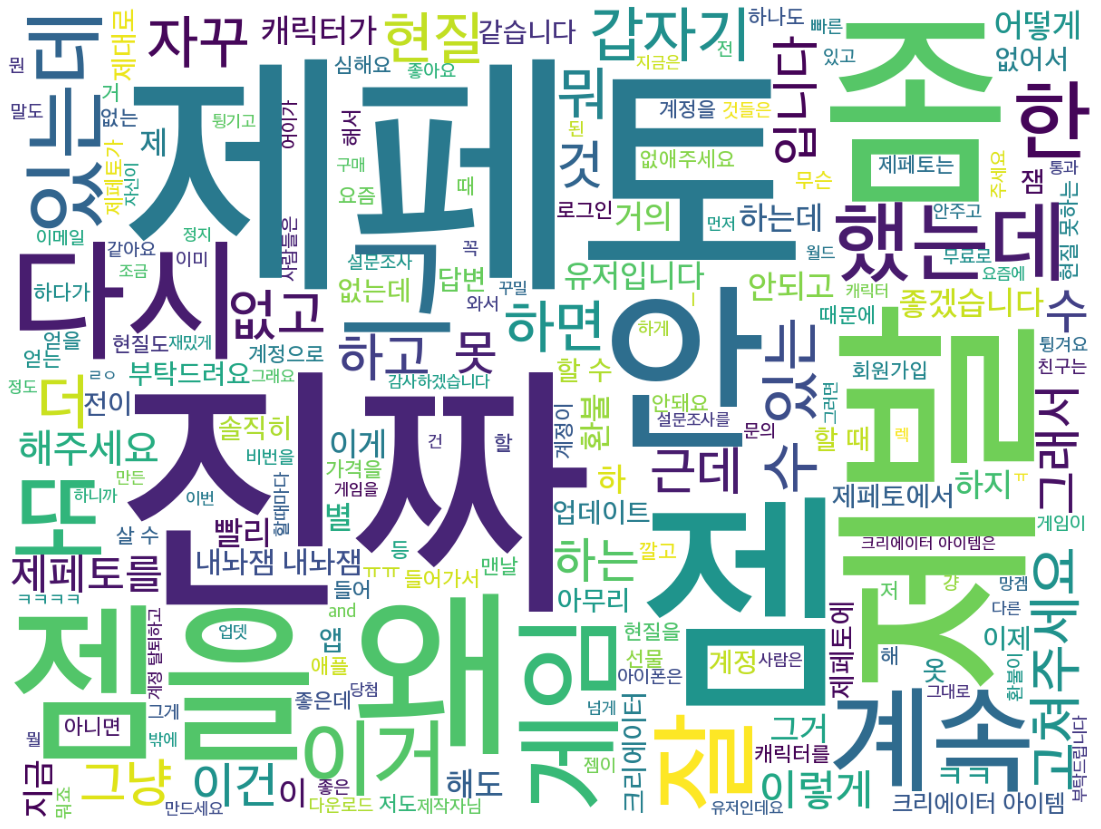

In [120]:
%time
displayWordCloud(' '.join(sentences01))

#### ÌäπÏ†ï Îã®Ïñ¥Î•º Ìè¨Ìï®ÌïòÎäî ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±ÌïòÍ∏∞ 

Wall time: 0 ns
Wall time: 0 ns


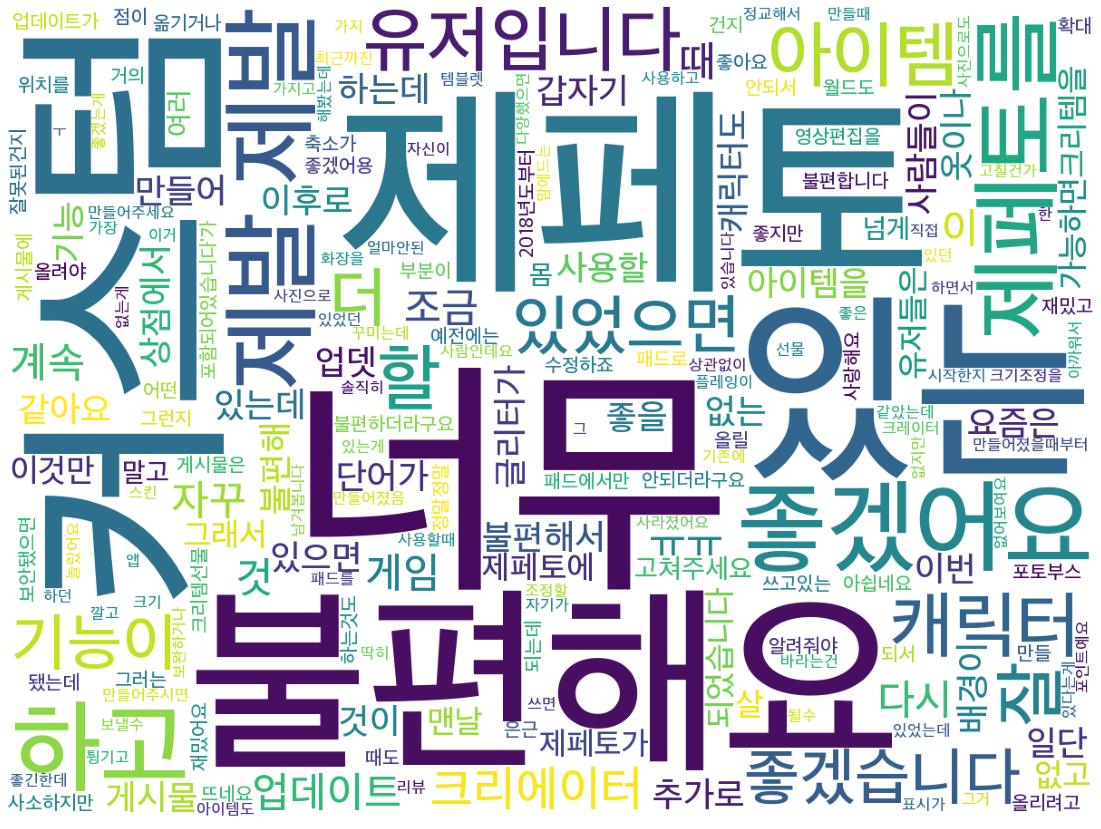

In [143]:
p1 = r'.*(Ïª§Ïä§ÌÖÄ |Î∂àÌé∏Ìï¥).*'
collect01 = df[df['REVIEW'].str.match(p1)]
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

Wall time: 0 ns
Wall time: 0 ns


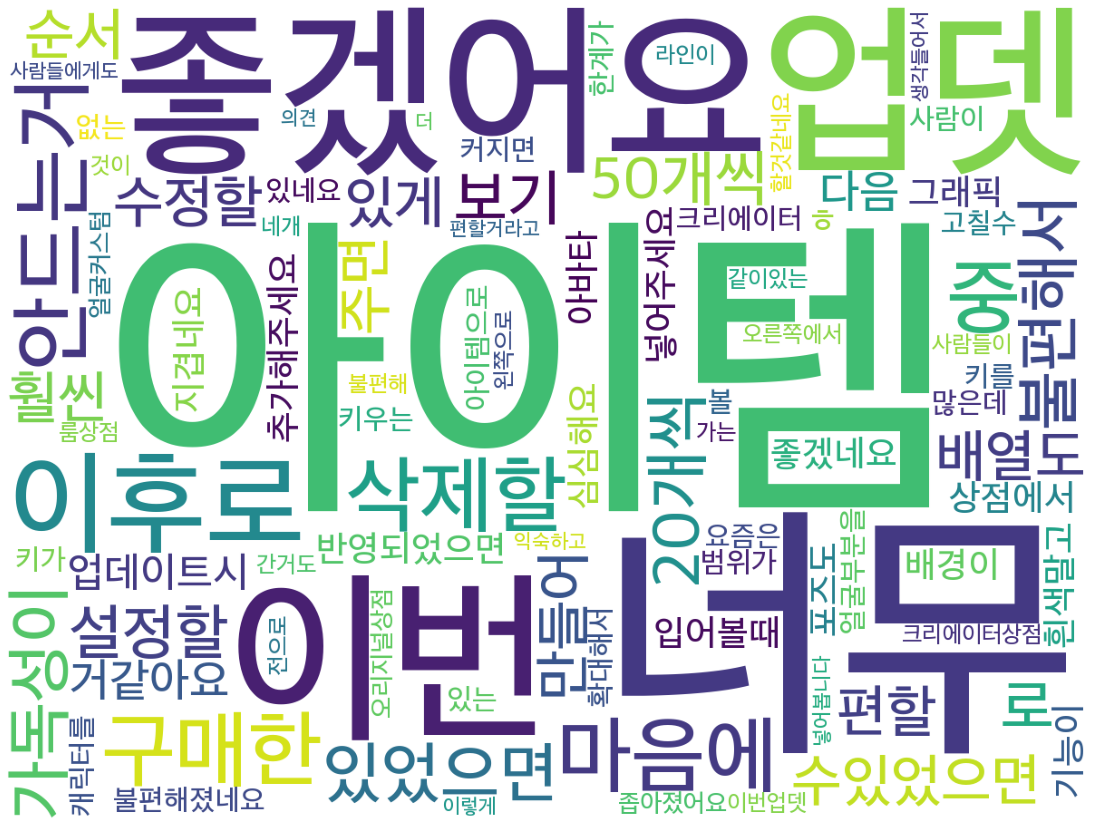

In [155]:
p1 = r'.*(ÏÉÅÏ†ê | Î∞∞Ïó¥).*'
collect01 = df[df['REVIEW'].str.match(p1)]
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))

In [53]:
# Ïó¨Í∏∞ÏÑú TITLE Ïª¨ÎüºÎßå Í∞ñÍµ¨Ïò¨Í±∞ÏûÑ
df

DATE  STAR  LIKE  DISLIKE                   TITLE  \
0    2022-07-22 16:51:14     5     0        0               ÎÑàÎ¨¥ Í≥†ÎßàÏõåÏöî‚Ä¶üíó   
1    2022-07-22 11:25:05     1     0        0                     ÌõÑ..   
2    2022-07-22 07:54:59     5     0        0  ÌóàÏúÑÏã†Í≥†, Ïò§Î•ò, Î∂àÏ∞∞ÎèÑ Í≤ÄÌÜ† Ìï¥Ï£ºÏÑ∏Ïöîüò•   
3    2022-07-22 07:13:59     1     0        0                       „Öã   
4    2022-07-22 02:14:56     5     0        0                      Ï¢ãÏùå   
..                   ...   ...   ...      ...                     ...   
495  2022-04-07 10:25:11     1     0        0     Ïò∑ÏûÖÌûêÎïå ÌëúÏ†ï Î∞îÎÄêÍ±∞ ÎÑàÎ¨¥ Ïù¥ÏÉÅÌï¥Ïöî   
496  2022-04-07 08:11:49     5     0        0                     ÌôîÏßàÏ¢Ä   
497  2022-04-07 04:58:56     4     0        0               Î≥¥Ï∂©Ïù¥ ÌïÑÏöîÌï¥Ïöî.   
498  2022-04-07 04:58:35     5     0        0                     Ï†úÌéòÌÜ†   
499  2022-04-07 04:57:30     5     0        0              Ï∫êÎ¶≠ÌÑ∞ ÌëúÏ†ï, Ìè¨Ï¶à   

                                                REVIEW  
0      ÏúºÏïÑÏïÑÏïÑÏïÑÏïÑ„Öè„Öè„Öè„Öè\nÎìúÎîîÏñ¥ ÌÅ¨Î¶¨ÌÖúÏù¥!!!!!!!!!!\nÏïÑÏïÑÏïÑÏïÑ Í≥†ÎßàÏõåÏöîÏò§Ïò§Ïò§Ïò§‚ù§Ô∏è  
1    ÏïÑÎãà 31ÏùºÏß∏Ïù∏Îç∞ ÏÑ†Î¨ºÏù¥ ÏïàÎ≥¥ÎÇ¥Ï†∏Ïöî. Ï†úÍ∞Ä Ïô†ÎßåÌïòÎ©¥ Îßê ÏïàÌïòÎäîÎç∞ Ï†ÄÎèÑ ÏÇ¨Ï†ïÏù¥ ÏûàÍ≥†,...  
2    Ï†ÄÎäî Ï†úÌéòÌÜ† Ï¥àÏ∞ΩÍ∏∞ ÎïåÎ∂ÄÌÑ∞ Ïó¥Ïã¨Ìûà Íæ∏Ï§ÄÌûà Ï∫êÎ¶≠ÌÑ∞Î•º ÌÇ§Ïõå Ïò® Ïú†Ï†ÄÏûÖÎãàÎã§. Ï†ÄÎäî Ïã†Í≥† ...  
3    „Öà„Ñ¥ ÏûºÎØºÏù¥Îì§Îßå ÌïòÎäî Í≤åÏûÑÏûÑ \nÏù¥Í±∞ ÏôúÌï® Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ „Öã„Öã„Öã„Öã\nÏûºÎØºÏù¥Îì§ÏïÑ Í±ç Ï≥ê...  
4    Í∞ëÏûêÍ∏∞ Ï†úÌéòÌÜ† Î©îÏÑ∏ÏßÄÍ∞Ä Îã§ ÏßÄÏõåÏßàÏàòÏûàÎÇòÏöî?\nÏßÄÏö¥Í±¥ ÏïÑÎãåÎç∞ Îã§ ÎÇ†ÏïÑÍ∞ÄÎäîÍ±∞ÎùºÍ≥† Ìï¥ÏïºÌïò...  
..                                                 ...  
495                                        Ï†ÑÏù¥ Ìõ®Ïî¨ ÎÇòÏïÑÏöî..  
496                            Ï†úÌéòÌÜ† Ïß±~~\nÏïÑÏù¥Ìå®Îìú ÌôîÏßàÏ¢Ä Ïò¨Î†§Ï£ºÏÑ∏Ïó¨  
497  ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†úÌéòÌÜ† 3ÎÖÑÏ∞® Ïú†Ï†ÄÏù∏Îç∞Ïöî.\nÏû¨ÌéòÌÜ†ÏóêÎäî Íº≠ Î≥¥Ï∂©Ìï†Ï†êÏù¥ ÏûàÏäµÎãàÎã§.\n1.ÌÅ¨...  
498  ÏßÑÏßú Ïò§Îû´ÎèôÏïà Ìï¥ ÏôîÎäîÎç∞ Îã§Î•∏ Í±¥ Îã§ Ï¢ãÏïÑÏöî Í∑∏Î†áÏßÄÎßå Ïù¥Í±¥ Ï¢Ä ÎÑàÎ¨¥Ìïú Í±∞ ÏïÑÎãåÍ∞ÄÏöî„Ö†...  
499  ÏßÑÏßú Îã§ Ï¢ãÏùÄÎç∞ Ï∫êÎ¶≠ÌÑ∞ Ïò∑ ÏÇ¥Îïå ÎåÄÍ∏∞Ïã§?Ïóê ÏÑúÏûàÎäî Í≤å Î∞îÎÄåÍ≥†ÎÇòÏÑú Îù®ÎπµÌïú ÌëúÏ†ïÏù¥ ÎßòÏóê...  

[500 rows x 6 columns]

In [54]:
p1 = r'.*(Î©îÏÑ∏ÏßÄ | Ïª§Îßà | Ï∫êÎ¶≠ÌÑ∞ | Ïò∑ | Ïò§Î•ò | ÌÅ¨Î¶¨ÌÖú | Í≥ÑÏ†ï).*'
pro1 = df[df['TITLE'].str.match(p1)]
pro1.shape

(13, 6)

In [55]:
pro1.head()

DATE  STAR  LIKE  DISLIKE  \
19   2022-07-18 19:11:22     1     0        0   
38   2022-07-15 23:12:07     5     0        0   
108  2022-07-06 23:02:22     3     0        0   
117  2022-07-04 12:26:44     1     0        0   
139  2022-06-30 00:09:18     5     0        0   

                                                 TITLE  \
19                                    ÎßùÎë•Ïñ¥ Ïò§Î•ò Í≥†Ï≥êÏ£ºÏÑ∏Ïöî Ï†úÎ∞úÏöî   
38                                   Ï†ú Í≥ÑÏ†ïÏ¢Ä ÏÇ¥Î†§Ï£ºÏÑ∏Ïöî Ï†úÎ∞ú...   
108                            Ïã§ÏàòÎ°ú ÏóÜÏñ¥ÏßÑ ÎÇ¥ 1.0k Í≥ÑÏ†ï...„Öú-„Öú   
117                                             ÎÇ†ÎùºÍ∞Ñ Í≥ÑÏ†ï   
139  Ï†úÎ∞ú Ï†ëÏÜç ÌïòÏûêÎßàÏûê ÌäïÍ∏∞ÎäîÍ±∞ Î≤ÑÍ∑∏ Ïã§ÌôîÏù∏Í∞ÄÏöî?? Ï†ëÏùÄÍ±∞ Í∞ôÏïÑÏÑú ÏÑ≠ÏÑ≠Ìï¥Ïöî ÏÑúÎπÑÏä§ Ï†úÎ∞ú...   

                                                REVIEW  
19   ÏõîÎìúÏóê Í∞ÄÎ©¥ ÏûêÍæ∏ Í∏∞Ï°¥Ïóê ÏûàÎçò ÏïÑÎ∞îÌÉÄÍ∞Ä ÌÇ§Í∞Ä ÏûëÏïÑÏßÄÎ©¥ÏÑú ÎßùÎë•Ïñ¥Í∞Ä ÎêòÎäîÎç∞ Ï†úÎ∞ú Í≥†Ï≥êÏ£º...  
38   Ìä∏ÏúÑÌÑ∞ Î°úÍ∑∏Ïù∏Ïù∏Îç∞ Ìä∏ÏúÑÌÑ∞ Í≥ÑÏ†ïÏù¥ ÏóÜÏñ¥Ï°åÏñ¥Ïöî Í≥ÑÏ†ï ÏïÑÏù¥ÎîîÎèÑ Í∏∞ÏñµÎÇòÏöî _x_kyoxae...  
108  ÏïàÎÖï ÌïòÏÑ∏Ïöî..1.0k Í≥ÑÏ†ïÏùÑ ÏûÉÏñ¥ Î≤ÑÎ¶∞.. ÏÇ¨Îûå ÏûÖÎãàÎã§..\nÎ∂ÄÍ≥ÑÎ•º ÎßåÎì§Î†§Í≥† ÌïòÎã§...  
117  ÎÇ†ÎùºÍ∞Ñ Í≥ÑÏ†ïÏùÑ Î™áÍ∞úÏõîÏß∏ ÏÇ¨Ïö© Î™ªÌïòÍ≥† ÏûàÏäµÎãàÎã§\nÍ∑∏ Í≥ÑÏ†ïÏúºÎ°ú ÌòÑÏßàÎèÑ ÎßéÏù¥ÌïòÍ≥† Ïù¥Ï†ú 1...  
139  4Í∞úÏõî Ï†Ñ Î∂ÄÌÑ∞ Ïïà Îì§Ïñ¥ Í∞ÄÏ†∏Ïöî „Ö†„Ö† Ïù¥Í±∞ Ïñ∏Ï†ú ÌíÄÎ¶¨ÎÇòÏöî?? 2020ÎÖÑÎ∂ÄÌÑ∞ Ìï¥ÏôîÎäîÎç∞...

In [56]:
sample_index = 10

In [57]:
sample_content = df['TITLE'][sample_index]
sample_content

'Îã§ Ï¢ãÏùÄÎç∞ ÏïÑÏâ¨Ïö¥ Ï†ê ü§ß'

In [58]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [59]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'Îã§ Ï¢ãÏùÄÎç∞ ÏïÑÏâ¨Ïö¥ Ï†ê ü§ß'

In [60]:
#  ÌååÏù¥Ïç¨ Í∞úÌñâÎ¨∏Ïûê Ï†úÍ±∞ 
##(Ï∂úÏ≤ò: Ïò§ÎäòÏΩîÎìú | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [61]:
%time
sentences01 = df['TITLE'].apply(preprocess)

Wall time: 0 ns


In [62]:
#RegexTokenizerÎ°ú Î¨∏ÏûêÏó¥ Î∂ÑÎ¶¨ ÏôÑÎ£å ~ 
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0                          [ÎÑàÎ¨¥, Í≥†ÎßàÏõåÏöî, ‚Ä¶üíó]
1                                 [ÌõÑ, ..]
2      [ÌóàÏúÑÏã†Í≥†, ,, Ïò§Î•ò, ,, Î∂àÏ∞∞ÎèÑ, Í≤ÄÌÜ†, Ìï¥Ï£ºÏÑ∏Ïöî, üò•]
3                                     [„Öã]
4                                    [Ï¢ãÏùå]
                      ...                
495             [Ïò∑ÏûÖÌûêÎïå, ÌëúÏ†ï, Î∞îÎÄêÍ±∞, ÎÑàÎ¨¥, Ïù¥ÏÉÅÌï¥Ïöî]
496                                 [ÌôîÏßàÏ¢Ä]
497                        [Î≥¥Ï∂©Ïù¥, ÌïÑÏöîÌï¥Ïöî, .]
498                                 [Ï†úÌéòÌÜ†]
499                      [Ï∫êÎ¶≠ÌÑ∞, ÌëúÏ†ï, ,, Ìè¨Ï¶à]
Name: TITLE, Length: 500, dtype: object

#### Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±

#ÏÑ†Î™ÖÌïú displayÎ•º ÏúÑÌï¥ retina ÏòµÏÖò Ï∂îÍ∞Ä 
%config InlineBackend.figure_format = 'retina'

In [63]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§ 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [64]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎäî c++ ÏÑ§ÏπòÍ∞Ä ÏÑ†ÌñâÎêòÏñ¥Ïïº ÏÑ§ÏπòÌï† Ïàò ÏûàÎã§ 
# https://decdream08.tistory.com/2
#https://mithumbsup.tistory.com/12

In [65]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÑ§Ïπò
!pip install wordcloud

In [66]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§ 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#### Î∂àÏö©Ïñ¥ ÏßÄÏ†ï

In [67]:
stopwords_kr = ['ÌïòÏßÄÎßå', 'Í∑∏Î¶¨Í≥†', 'Í∑∏Îü∞Îç∞', 'ÎÇòÎäî', 'Ï†ÄÎäî', 'Ï†úÍ∞Ä', 'ÎÇ¥Í∞Ä',
 'Í∑∏Îüº', 'Îß§Ïö∞', '!!!', '!', '!!', '!!!!', 'ÎÇ¥', 'Ï†ïÎßê', 'ÎÑàÎ¨¥',
 'ÎßéÏù¥', 'ÎßéÏùÄ', 'Í≤ÉÏùÑ', 'Ïù¥Îü∞', 'Ï†ÄÎü∞', 'Ìï©ÎãàÎã§', 'KKKK', 'Ï†úÌíàÏùÑ'
 ,'ÎïåÎ∂ÄÌÑ∞', 'Ìõ®Ïî¨', 'Ï†ÑÏù¥', 'Îã§Î•∏', 'ÏßÄÍ∏àÍπåÏßÄ', 'Îã§ Ï¢ãÏùÄÎç∞', 'Ïû•Ïï†ÏÉàÎÅºÎì§ÏïÑ', '„Öà„Ñ¥',
 '„Öã„Öã„Öã','ÏïÑÎãà','ÏïàÎÖïÌïòÏÑ∏Ïöî','Îã§']

In [68]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìè∞Ìä∏ ÏßÄÏ†ï 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [69]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [70]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr, #Î∂àÏö©Ïñ¥ Ï†úÍ±∞ 
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [71]:
# https://hyeonukdev.github.io/2020/05/04/Error/WordCloud/

#### ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÌëúÌòÑÌïòÍ∏∞ 

Wall time: 0 ns


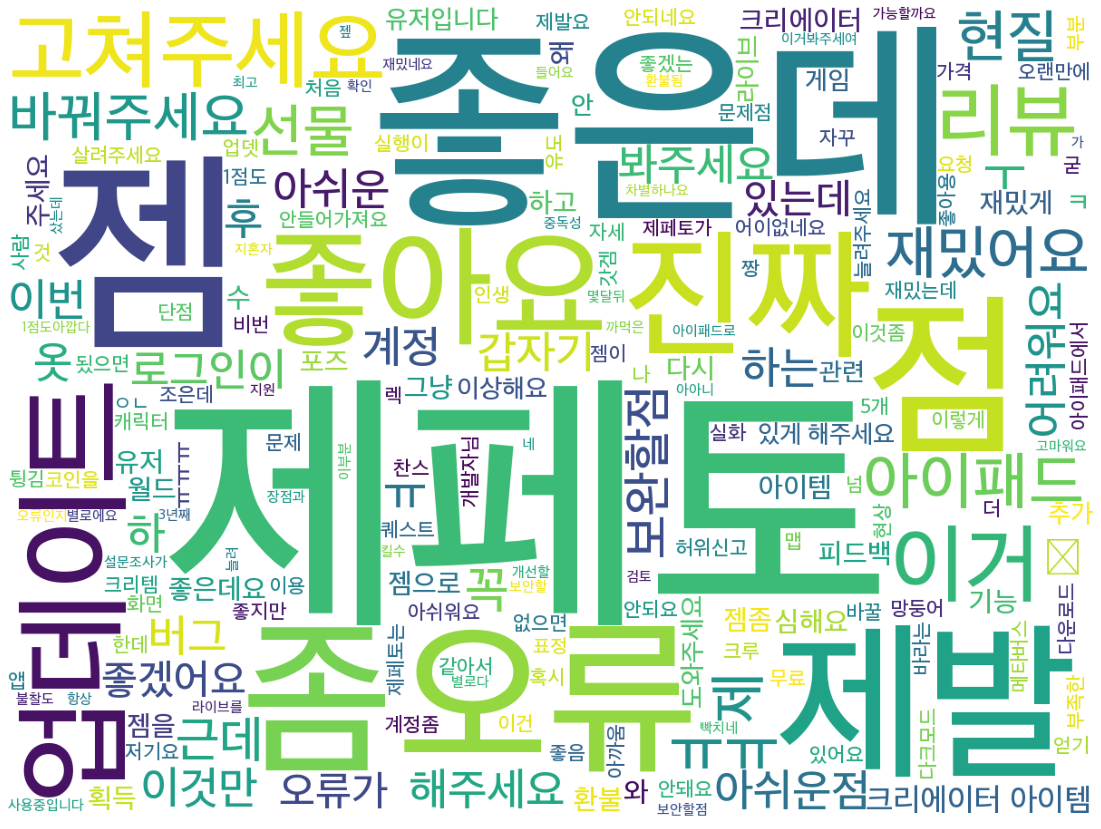

In [72]:
%time
displayWordCloud(' '.join(sentences01))

#### ÌäπÏ†ï Îã®Ïñ¥Î•º Ìè¨Ìï®ÌïòÎäî ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±ÌïòÍ∏∞ 

In [81]:
p1 = r'.*(Ïñ¥Î†§).*'
collect01 = df[df['REVIEW'].str.match(p1)]
collect01.shape

(15, 6)

Wall time: 0 ns
Wall time: 0 ns


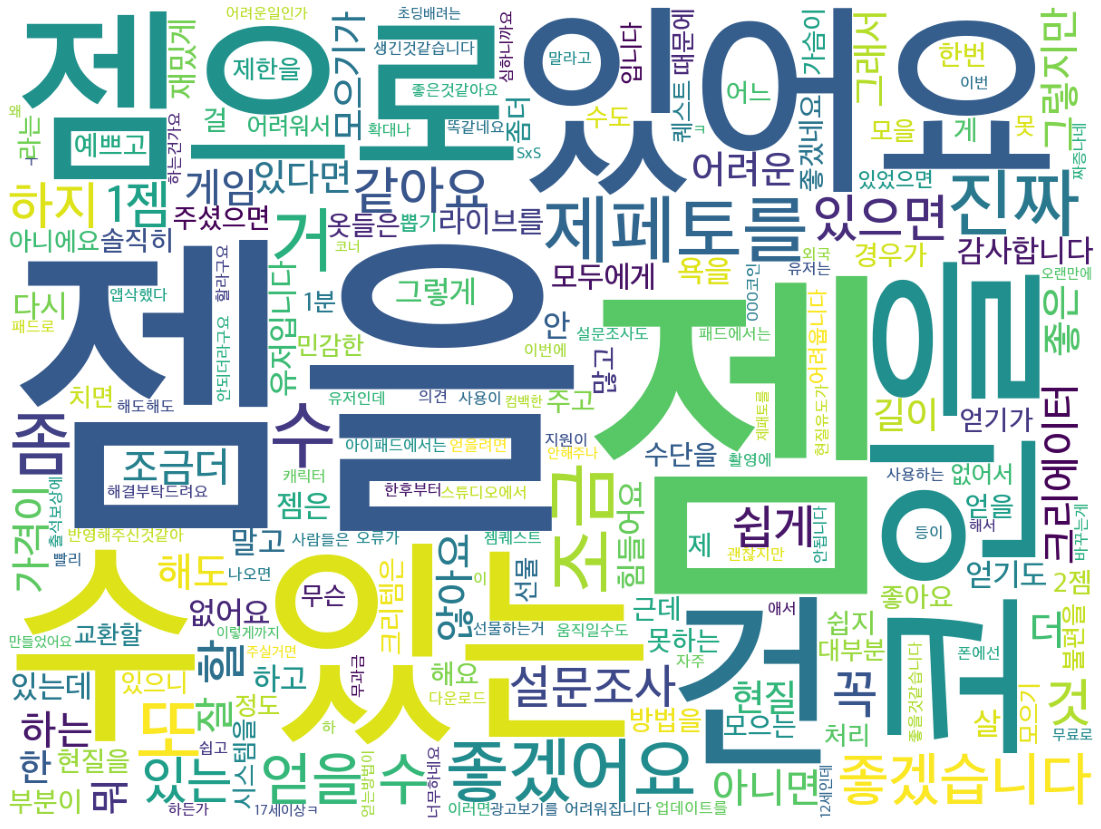

In [82]:
%time
col01 = collect01['REVIEW'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))